# Example Template for HW3

This notebook contains the same template code as "logisticClassify2.py", but reorganized to make it simpler to edit and solve in iPython.  Feel free to use this for your homework, or do it another way, as you prefer.



In [2]:
from __future__ import division

import numpy as np
np.random.seed(0)

import mltools as ml
import sys
sys.path.append('code')

import matplotlib.pyplot as plt   # use matplotlib for plotting with inline plots
plt.set_cmap('jet');
%matplotlib inline
import warnings
warnings.filterwarnings('ignore'); # for deprecated matplotlib functions

## Problem 1

In [3]:
iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1]   # get first two features & target
X,Y  = ml.shuffleData(X,Y)       # reorder randomly rather than by class label
X,_  = ml.transforms.rescale(X)  # rescale to improve numerical stability, speed convergence

XA, YA = X[Y<2,:], Y[Y<2]        # Dataset A: class 0 vs class 1
XB, YB = X[Y>0,:], Y[Y>0]        # Dataset B: class 1 vs class 2

### P1.1

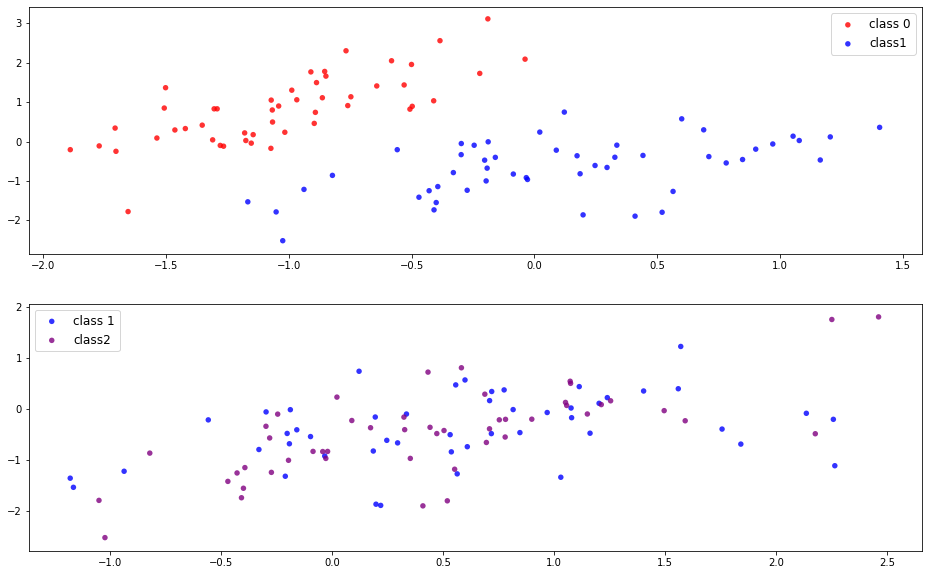

In [3]:
fig,ax1 = plt.subplots(2,1,figsize=(16,10))
ax1[0].scatter(XA[YA==0,0], XA[YA==0,1], alpha=0.8, c='red', edgecolors='none', s=30)
ax1[0].scatter(XA[YA==1,0], XA[YA==1,1], alpha=0.8, c='blue', edgecolors='none', s=30)
ax1[0].legend(['class 0','class1'],fontsize=12)
ax1[1].scatter(XB[YA==0,0], XB[YA==0,1], alpha=0.8, c='blue', edgecolors='none', s=30)
ax1[1].scatter(XB[YA==1,0], XB[YA==1,1], alpha=0.8, c='purple', edgecolors='none', s=30)
ax1[1].legend(['class 1','class2'],fontsize=12)

Class 0 and Class 1 are linearly seperable. 

Class 1 and class 2 are not linearly seperable.

### P1.2

In [ ]:
    def plotBoundary(self,X,Y):

        x1b = np.array([ax[0],ax[1]]);  # at X1 = points in x1b
        x2b = (-self.theta[0]-self.theta[1]*x1b)/self.theta[2]; 
        

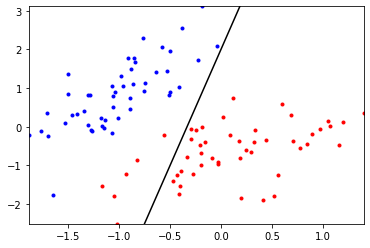

In [4]:
# Create a shell classifier
from logisticClassify2 import *
learnerA = logisticClassify2()
learnerA.classes = np.unique(YA)       # store the class values for this problem
learnerA.theta = np.array([2,6,-1]);  # TODO: insert hard-coded values
learnerA.plotBoundary(XA,YA)
plt.show()

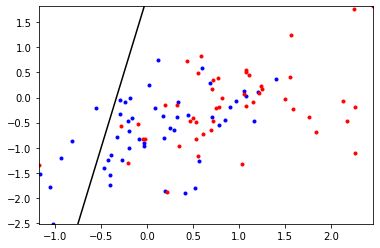

In [5]:
learnerB = logisticClassify2()
learnerB.classes = np.unique(YB)       # store the class values for this problem
learnerB.theta = np.array([2,6,-1]);  # TODO: insert hard-coded values
learnerB.plotBoundary(XB,YB)
plt.show()

### P1.3

In [ ]:
def predict(self, X):
    z = self.theta[0] + X.dot(self.theta[1:])
    Yhat = np.asarray(self.classes)[(z > 0).astype(int)]
    return Yhat

In [6]:
learnerA = logisticClassify2()
learnerA.classes = np.unique(YA)       # store the class values for this problem
learnerA.theta = np.array([2,6,-1]);  # TODO: insert hard-coded values
print("Error fraction of data  set A is: {}".format(learnerA.err(XA,YA)))

Error fraction of data  set A is: 0.06060606060606061


In [7]:
learnerB = logisticClassify2()
learnerB.classes = np.unique(YB)       # store the class values for this problem
learnerB.theta = np.array([2,6,-1]);  # TODO: insert hard-coded values
print("Error fraction of data  set B is: {}".format(learnerA.err(XB,YB)))

Error fraction of data  set B is: 0.5555555555555556


If predict is implemented, then the inherited 2D visualization function should work; you can verify your decision boundary from P1.2:

### P1.4

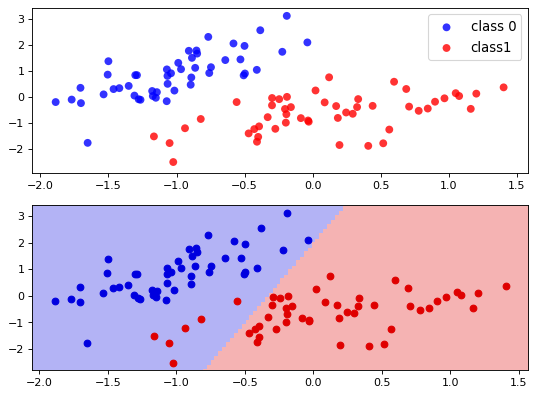

In [8]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(211)
plt.scatter(XA[YA==0,0], XA[YA==0,1], alpha=0.8, c='blue', edgecolors='none', s=50)
plt.scatter(XA[YA==1,0], XA[YA==1,1], alpha=0.8, c='red', edgecolors='none', s=50)
plt.legend(['class 0','class1'],fontsize=12)
plt.subplot(212)
ml.plotClassify2D(learnerA,XA,YA)
plt.show()

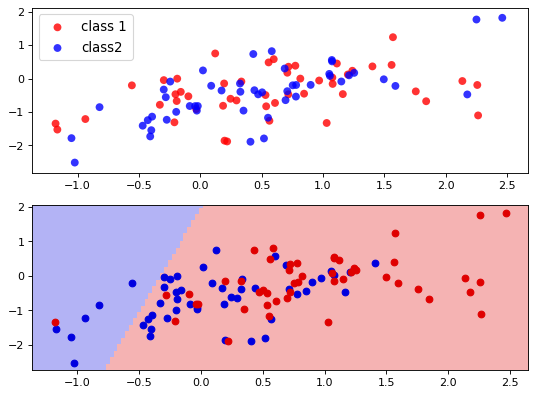

In [9]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(211)
plt.scatter(XB[YA==0,0], XB[YA==0,1], alpha=0.8, c='red', edgecolors='none', s=50)
plt.scatter(XB[YA==1,0], XB[YA==1,1], alpha=0.8, c='blue', edgecolors='none', s=50)
plt.legend(['class 1','class2'],fontsize=12)
plt.subplot(212)
ml.plotClassify2D(learnerB,XB,YB)
plt.show()

## ...


Here is an example of latex equations that may be useful for expressing the gradient:

### 1.5 Gradient of NLL

Our negative log-likelihood loss is:
$$J_j(\theta) = - \begin{cases} \log( \sigma(x^{(i)} \cdot \theta)) & \mbox{if}\  y^{(i)}=1 \\ \log(1-\sigma(x^{(i)} \cdot \theta)) & \mbox{if}\  y^{(i)}=0 \end{cases}$$

Thus, its gradient is:
$$\nabla J_j(\theta) = (something)$$

### P1.5

$$J_i(\theta) = - \begin{cases} \log( \sigma(x^{(i)} \cdot \theta)) & \mbox{if}\  y^{(i)}=1 \\ \log(1-\sigma(x^{(i)} \cdot \theta)) & \mbox{if}\  y^{(i)}=0 \end{cases}$$


$$ \sigma(r) = (1+exp(-r))^{-1}$$
$$ J_i(\theta) =  -\log( \sigma(x^{(i)} \cdot \theta)) - log(1-\sigma(x^{(i)} \cdot \theta))$$ 

Thus, its gradient is:
$$\nabla J_i(\theta) = \frac{-y^{(i)} \sigma ' (x^{(i)} \cdot \theta) \cdot }{\sigma(x^{(i)} \cdot \theta)} + \frac{(1-y^{(i))} \cdot \sigma ' (x^{(i)} \cdot \theta)}{1-\sigma(x^{(i)} \cdot \theta)}$$ 

$$\sigma ' (x^{(i)} \cdot \theta) = \sigma (x^{(i)} \cdot \theta) \cdot (1-\sigma (x^{(i)} \cdot \theta)) \cdot (x^{(i)} \cdot \theta) '$$

$$\sigma ' (x^{(i)} \cdot \theta) = \sigma (x^{(i)} \cdot \theta) \cdot (1-\sigma (x^{(i)} \cdot \theta)) \cdot x^{(i)}$$

$$\nabla J_i(\theta) = \frac{-y^{(i)} \sigma ' (x^{(i)} \cdot \theta)  }{\sigma(x^{(i)} \cdot \theta)} + \frac{(1-y^{(i))} \cdot \sigma ' (x^{(i)} \cdot \theta)}{1-\sigma(x^{(i)} \cdot \theta)}$$

$$\nabla J_i(\theta) = \frac{-y^{(i)} \cdot x^{(i)}\sigma (x^{(i)} \cdot \theta) \cdot (1-\sigma (x^{(i)} \cdot \theta))  }{\sigma(x^{(i)} \cdot \theta)} + \frac{(1-y^{(i)}） \cdot x^{(i)} \cdot \sigma (x^{(i)} \cdot \theta) \cdot (1-\sigma (x^{(i)} \cdot \theta))}{1-\sigma(x^{(i)} \cdot \theta)}$$

$$\nabla J_i(\theta) = -y^{(i)}  \cdot (1-\sigma (x^{(i)} \cdot \theta))\cdot x^{(i)} + (1-y^{(i)}） \cdot \sigma (x^{(i)} \cdot \theta))\cdot x^{(i)}$$

$$\nabla J_i(\theta) = -y^{(i)}  \cdot (1)\cdot x^{(i)} + (1) \cdot \sigma (x^{(i)} \cdot \theta)\cdot x^{(i)}$$

$$\nabla J_i(\theta) = (-y^{(i)} + \sigma (x^{(i)} \cdot \theta))\cdot x^{(i)}$$

$$\nabla J_j(\theta) = (-y^{(j)} + \sigma (x^{(j)} \cdot \theta))\cdot x^{(j)}$$

### P1.7

In [2]:
    def train(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None):
        """ Train the logistic regression using stochastic gradient descent """
        from IPython import display
        M,N = X.shape;                     # initialize the model if necessary:
        self.classes = np.unique(Y);       # Y may have two classes, any values
        XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
        YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
        if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
        # init loop variables:
        epoch=0; done=False; Jnll=[]; J01=[];
        while not done:
            stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
            # Do an SGD pass through the entire data set:
            for i in np.random.permutation(M):
                ri = 1.0 / (1.0 + np.exp(-XX[i,:].dot(self.theta)))     # TODO: compute linear response r(x)
                gradi = -(1-ri)*XX[i,:] if YY[i] else ri*XX[i,:];     # TODO: compute gradient of NLL loss
                self.theta -= np.float64(stepsize) * np.float64(gradi);  # take a gradient step

            J01.append( self.err(X,Y) )  # evaluate the current error rate

            ## TODO: compute surrogate loss (logistic negative log-likelihood)
            ##  Jsur = - sum_i [ (log si) if yi==1 else (log(1-si)) ]
            JL = 1.0/(1.0+np.exp(-(XX.dot(self.theta))))
            Jnll.append( -np.mean(YY*np.log(JL)+(1-YY)*np.log(1-JL)) ) # TODO evaluate the current NLL loss
            display.clear_output(wait=True);
            plt.subplot(1,2,1); plt.cla(); plt.plot(Jnll,'b-',J01,'r-'); # plot losses
            if N==2: plt.subplot(1,2,2); plt.cla(); self.plotBoundary(X,Y); # & predictor if 2D
            plt.pause(.01);                    # let OS draw the plot        

            ## For debugging: you may want to print current parameters & losses
            # print self.theta, ' => ', Jnll[-1], ' / ', J01[-1]
            # raw_input()   # pause for keystroke

            # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
            done = epoch>=stopEpochs or (epoch>1 and abs(Jnll[-1]-Jnll[-2])<stopTol);   # or if Jnll not changing between epochs ( < stopTol )

### P1.7


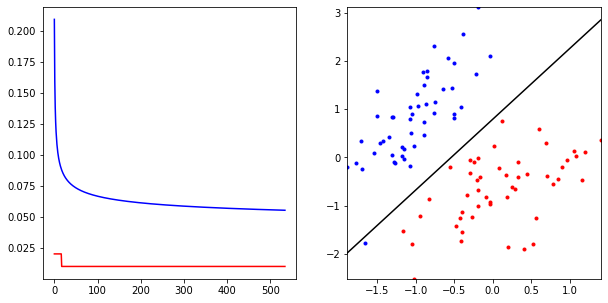

In [10]:
plt.rcParams['figure.figsize'] = (10,5)    # make a wide figure, for two subplots
learnerA = logisticClassify2()
learnerA.theta = np.float64(np.array([0,0,0]))
learnerA.train(XA,YA,initStep=1e-1,stopEpochs=1000,stopTol=1e-5);

For the step size, use initStep*2.0/(2.0+epoch) where epoch is the current step number. Which means that we take big step as initstep at the beginning and as the step number goes up, the step size we use will decreases. The stopping criteria use is when the nearby two batch grident decent lose function less tha 1e-4. 

Error rate is red and surrgote loss is blue.

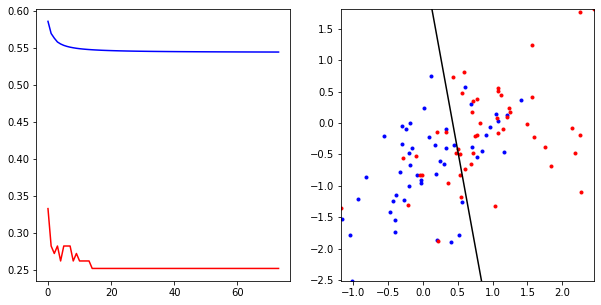

In [12]:
plt.rcParams['figure.figsize'] = (10,5)    # make a wide figure, for two subplots
learnerB = logisticClassify2()
learnerB.theta = np.float64(np.array([0,0]))
learnerB.train(XB,YB,initStep=1e-1,stopEpochs=1000,stopTol=1e-5);

For the step size, use initStep*2.0/(2.0+epoch) where epoch is the current step number. Which means that we take big step as initstep at the beginning and as the step number goes up, the step size we use will decreases. The stopping criteria use is when the nearby two batch grident decent lose function less tha 1e-4. 

Error rate is red and surrgote loss is blue.

### P1.8

In [3]:
    def ltrain(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000,alpha=1,plot=None):
        """ Train the logistic regression using stochastic gradient descent """
        from IPython import display
        M,N = X.shape;                     # initialize the model if necessary:
        self.classes = np.unique(Y);       # Y may have two classes, any values
        XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
        YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
        if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
        # init loop variables:
        epoch=0; done=False; Jnll=[]; J01=[];
        while not done:
            stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
            # Do an SGD pass through the entire data set:
            for i in np.random.permutation(M):
                ri = 1.0 / (1.0 + np.exp(-XX[i,:].dot(self.theta)))     # TODO: compute linear response r(x)
                gradi = -(1-ri)*XX[i,:]+alpha*2*self.theta if YY[i] else ri*XX[i,:]+alpha*2*self.theta ;  
                self.theta -= np.float64(stepsize) * np.float64(gradi);  # take a gradient step

            J01.append( self.err(X,Y) )  # evaluate the current error rate

            ## TODO: compute surrogate loss (logistic negative log-likelihood)
            ##  Jsur = - sum_i [ (log si) if yi==1 else (log(1-si)) ]
            JL = 1.0/(1.0+np.exp(-(XX.dot(self.theta))))
            Jnll.append( -np.mean(YY*np.log(JL)+(1-YY)*np.log(1-JL)+alpha*self.theta.dot(self.theta.T)) ) # TODO evaluate the current NLL loss
            display.clear_output(wait=True);
            plt.subplot(1,2,1); plt.cla(); plt.plot(Jnll,'b-',J01,'r-'); # plot losses
            if N==2: plt.subplot(1,2,2); plt.cla(); self.plotBoundary(X,Y); # & predictor if 2D
            plt.pause(.01);                    # let OS draw the plot        

            ## For debugging: you may want to print current parameters & losses
            # print self.theta, ' => ', Jnll[-1], ' / ', J01[-1]
            # raw_input()   # pause for keystroke

            # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
            done = epoch>=stopEpochs or (epoch>1 and abs(Jnll[-1]-Jnll[-2])<stopTol);   # 

# ... ...

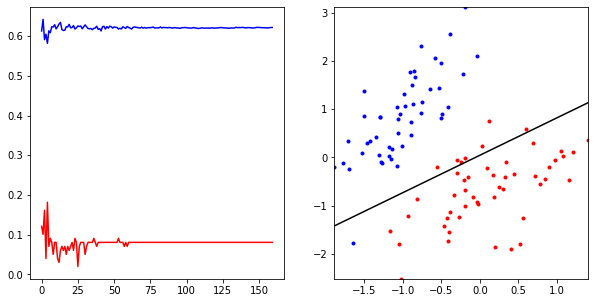

In [3]:
plt.rcParams['figure.figsize'] = (10,5)    # make a wide figure, for two subplots
learnerA = logisticClassify2()
learnerA.theta = np.float64(np.array([0,0,0]))
learnerA.ltrain(XA,YA,initStep=1e-1,stopEpochs=1000,stopTol=1e-5,alpha=2);

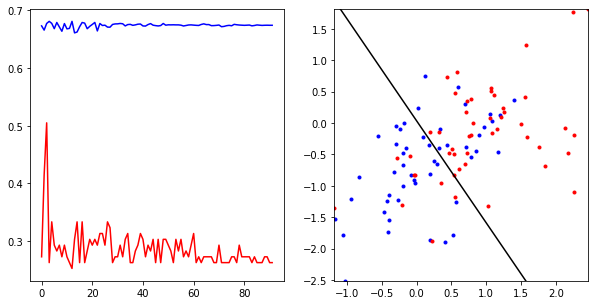

In [2]:
plt.rcParams['figure.figsize'] = (10,5)    # make a wide figure, for two subplots
learnerB = logisticClassify2()
learnerB.theta = np.float64(np.array([0,0,0]))
learnerB.ltrain(XB,YB,initStep=1e-1,stopEpochs=1000,stopTol=1e-5,alpha=2);

 Problem 2

1.$$T(a+bx_{1})$$

2.$$T((a*b)x_{1}+(c/a)x_{2})$$

3.$$T((x_{1}-a)^2+(x_{2}-b)^2+c)$$

4.$$T(a+x_{1}+cx_{2}) \times T(d+bx_{1}+cx_{2}) $$

1. $T(a+bx_{1})$ is a straight line perpendicular to x1 axis, thus it can only shatter the plane to left side and right side. For (b) we can just place the line between the two points. Thus, VC dimension >= 2. Consider (c), if y(2,2) is 1, y(4,8) is -1 and y(6,4) is 1. then no vertical line can shatter this data set. Thus VC dimension <3.

Thus, VC dimension is 2.

2. $T((a*b)x_{1}+(c/a)x_{2})$ linear classifier can shatter (b) if we just put the line through between the place for two points and put them on different sides. Thus VC dimension >= 2. Consider (c), if y(2,2) is 1, y(4,8) is 1 and y(6,4) is -1. Then no line in this form can splot (2,2) and (4,8) on one side and (6,4) in the other side. THus VC dimensiuon <3.


Thus, VC dimension is 2.

3. $T((x_{1}-a)^2+(x_{2}-b)^2+c)$ is a circle classifier which we can place the circle orignal every where in the plane. Thus, by including one or two or three points in the plane and leave the other out. (c) can be shattered. thus VC dimension >=3. For (d),consider that, (2,2) and (8,6) and (4,8) are -1 while (6,4) is +1. Then, since no circle can include  (2,2) and (8,6) and (4,8) withour include (2,2) thus. Cannot be shattered. Thus, VC dimension <4.

Thus VC dimension is 3.

4. $T(a+x_{1}+cx_{2}) \times T(d+bx_{1}+cx_{2})$ two parrel lines classifiers can shatter (6) by classifying any possibility for middle +1 two sides -1 or two sides +1 and middle -1. Thus, (d) can be easily shattered. Thus, VC dimension >= 4

## Problem 3

I did this by myself without discussing with others.